In [3]:
%load_ext autoreload
%autoreload 2

import pynwb
from pynwb import get_class
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Build the track in NetworkX

In [10]:
# Initialize a graph
G = nx.Graph(name='w-track')

# Add nodes to the graph
# ----------------------
# Segments
G.add_node('L', coords=[(1.6, 2.2), (1.6, 0.65)], kind='segment')
G.add_node('LC', coords=[(1.6, 0.65), (1.9, 0.65)], kind='segment')  
G.add_node('C', coords=[(1.9, 0.65), (1.9, 2.2)], kind='segment')  
G.add_node('RC', coords=[(1.9, 0.65), (2.2, 0.65)], kind='segment')  
G.add_node('R', coords=[(2.2, 0.65), (2.2, 2.2)], kind='segment')  
# Points
G.add_node('LW', coords=(1.6, 2.2), kind='point')
G.add_node('CW', coords=(1.9, 2.2), kind='point')
G.add_node('RW', coords=(2.2, 2.2), kind='point')
G.add_node('CP', coords=(1.9, 0.65), kind='point')

# Add edges connecting the appropriate nodes
# -----------------------------------------
# Segment <-> Segment
G.add_edge('L', 'LC')
G.add_edge('RC', 'R')
# Segment <-> Well
G.add_edge('L', 'LW')
G.add_edge('C', 'CW')
G.add_edge('R', 'RW')
# Choice Point <-> Segments
G.add_edge('CP', 'C')
G.add_edge('CP', 'LC')
G.add_edge('CP', 'RC')

### Plot the track topology from NetworkX

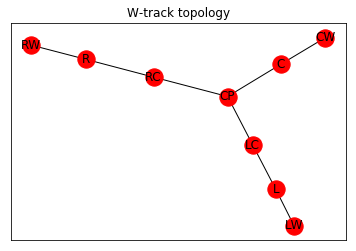

In [16]:
ax = plt.subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.title("W-track topology")
nx.draw_networkx(G, fontsize=6)
pass

### Plot geometry from NetworkX

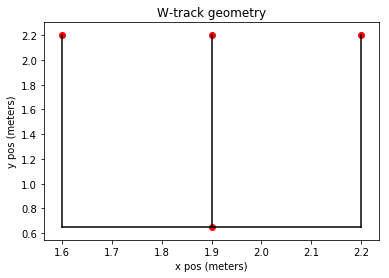

In [17]:
ax = plt.subplot(111)
plt.title('W-track geometry')
for n, attrs in list(G.nodes.data()):
    if attrs['kind']=='point':
        coord = attrs['coords']
        plt.scatter([coord[0]], [coord[1]], color='r')
    if attrs['kind']=='segment':
        start, end = attrs['coords']
        plt.plot([start[0], end[0]], [start[1], end[1]], color='k')
plt.xlabel('x pos (meters)')
plt.ylabel('y pos (meters)')
pass 

### Load FL extension namespace

In [4]:
ns_path = "franklab.namespace.yaml"
pynwb.load_namespaces(ns_path)

('franklab',)

### Get Python classes to use our extensions

In [5]:
FL_PointNode = get_class('FL_PointNode', 'franklab')
FL_SegmentNode = get_class('FL_SegmentNode', 'franklab')
FL_AreaNode = get_class('FL_AreaNode', 'franklab')


### Load our graph data into FL extension objects

### Save FL extensions into NWBfile

### Roundtrip the NWBfile with our graph data

### Extract graph data back out into NetworkX